## Splitting it to Test and Train

In [39]:
import pandas as pd
import numpy as np

dataSet = pd.read_csv('iris.csv')
dataSet.drop(columns=['Id','PetalLengthCm','PetalWidthCm'], inplace=True)
dataSet.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


In [40]:
lst = []
for x in dataSet.index:
    if (x==0) or (dataSet['Species'][x] != dataSet['Species'][x-1]):
        lst.extend([x,x+1,x+2])

print(lst)

[0, 1, 2, 50, 51, 52, 100, 101, 102]


In [41]:
testData = dataSet.loc[lst].copy()
testData

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
50,7.0,3.2,Iris-versicolor
51,6.4,3.2,Iris-versicolor
52,6.9,3.1,Iris-versicolor
100,6.3,3.3,Iris-virginica
101,5.8,2.7,Iris-virginica
102,7.1,3.0,Iris-virginica


In [42]:
trainData = dataSet.drop(index=lst)
trainData.head()

,SepalLengthCm,SepalWidthCm,Species
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
5,5.4,3.9,Iris-setosa
6,4.6,3.4,Iris-setosa
7,5.0,3.4,Iris-setosa


## Plotting the Training Dataset

Text(0, 0.5, 'Sepal Width in Cm')

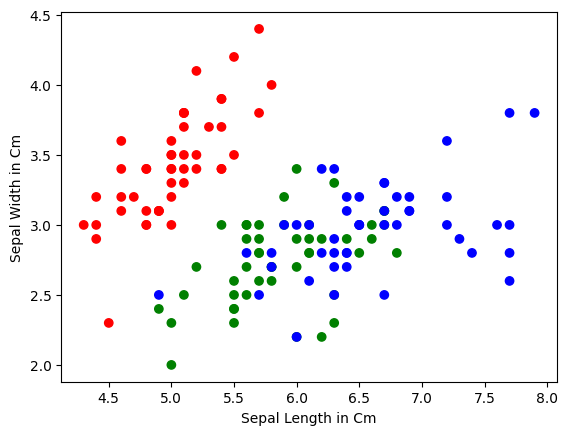

In [47]:
import matplotlib.pyplot as plt

clr= []
for x in trainData.index :
    if trainData['Species'][x]=='Iris-setosa':
        clr.append('r')
    elif trainData['Species'][x]=='Iris-versicolor':
        clr.append('g')
    elif trainData['Species'][x]=='Iris-virginica':
        clr.append('b')
    else:
        clr.append('k')
plt.scatter(x=trainData['SepalLengthCm'], y=trainData['SepalWidthCm'], color=clr)
plt.xlabel("Sepal Length in Cm")
plt.ylabel("Sepal Width in Cm")

### Inference from the plot
The plot is the representation for Sepal Width in cm VS Sepal length in Cm .<br>
It can be clearly seen that the width of the sepal for the Iris-setosa is more can can be eaisly classifed from the other 2 just on hte basis of the sepal length and width.

## Ecludian Distance


In [54]:
trainData.reset_index(inplace= True)
testData.reset_index(inplace=True)

In [64]:
def Eldist(x1,y1,x2,y2):
    x = (x1 - x2)**2
    y = (y1- y2)**2
    return np.sqrt(x+y)

AllDistance = []
for i in testData.index :
    subdist = []
    for j in trainData.index:
        dist = Eldist(testData['SepalLengthCm'][i],testData['SepalWidthCm'][i],trainData['SepalLengthCm'][j],trainData['SepalWidthCm'][j])
        subdist.append(dist)

    AllDistance.append(subdist)

AllDistance
type(AllDistance)

list